**Столбцы набора данных:**
- **id** - Идентификатор
- **battery_power** - Общая энергия, которую батарея может накопить за один раз, измеряется в мАч
- **blue** - Есть Bluetooth или нет
- **тактовая скорость** - Скорость, с которой микропроцессор выполняет команды
- **dual_sim** - Поддерживает две sim-карты или нет
- **fc** - Мегапиксельная фронтальная камера
- **four_g** - Поддерживает 4G или нет
- **int_memory** - Внутренняя память в гигабайтах
- **m_dep** - Глубина перемещения в сантиметрах
- **mobile_wt** - Вес мобильного телефона
- **n_cores** - Количество ядер процессора
- **pc** - Мегапиксели основной камеры
- **px_height** - Высота разрешения в пикселях
- **px_width** - Ширина разрешения в пикселях
- **ram** - Оперативная память в мегабайтах
- **sc_h** - Высота экрана мобильного устройства в см
- **sc_w** - Ширина экрана мобильного устройства в см
- **talk_time** - Максимальное время, на которое хватит одного заряда аккумулятора, когда вы находитесь в
- **three_g** - Есть 3G или нет
- **touch_screen** - Есть сенсорный экран или нет
- **wifi** - Есть Wi-Fi или нет    
- **price_range** - Целевая переменная со значением:
    - 0 (низкая стоимость)
    - 1 (средняя стоимость)
    - 2 (высокая стоимость)
    - 3 (очень высокая стоимость)
    
    
**Модели:**

- Support Vector Machine (SVM)
- Decision Tree
- Random Forest

# Импортирование библиотек


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.base import clone
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
%matplotlib inline

In [ ]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

warnings.filterwarnings('ignore')

#Чтение данных

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#Предобработка

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Проверка на дупликаты и пропуски

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


# Обнаружение шума

In [ ]:
df_numerical = df [['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                    'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'talk_time', 'sc_h', 'sc_w']]

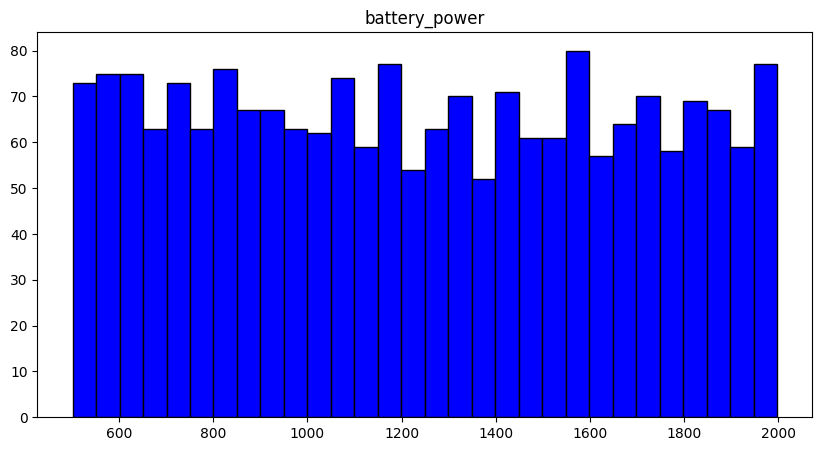

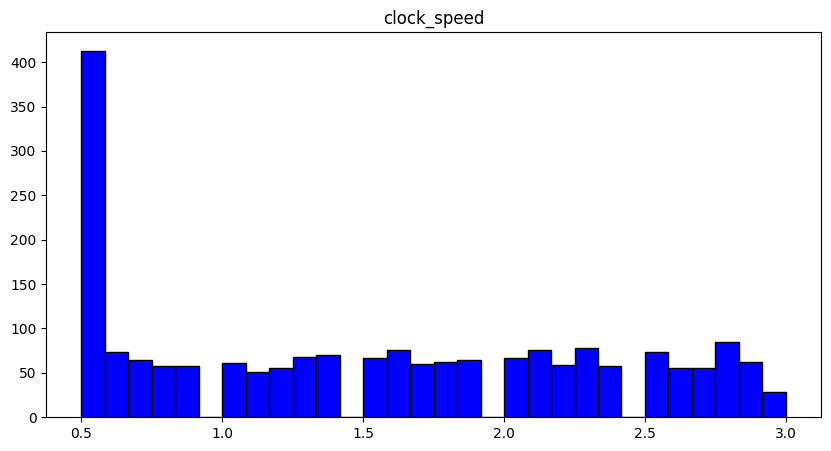

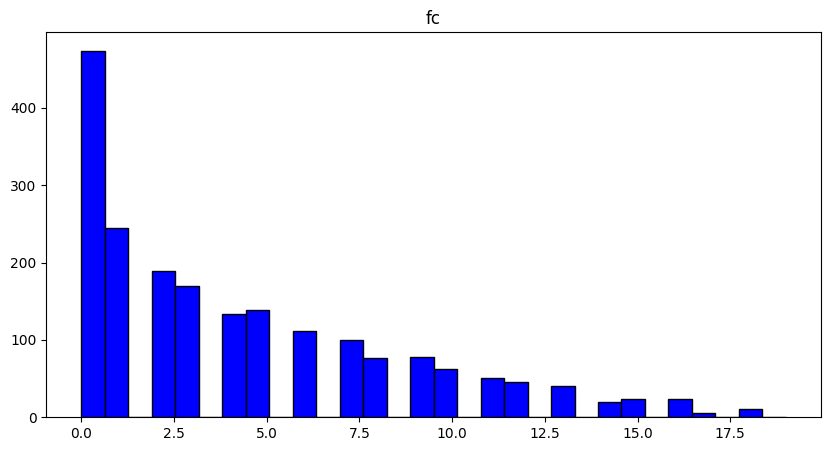

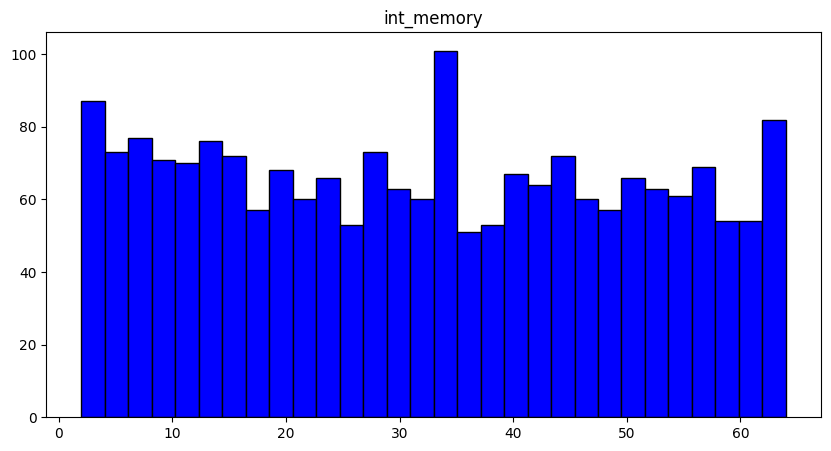

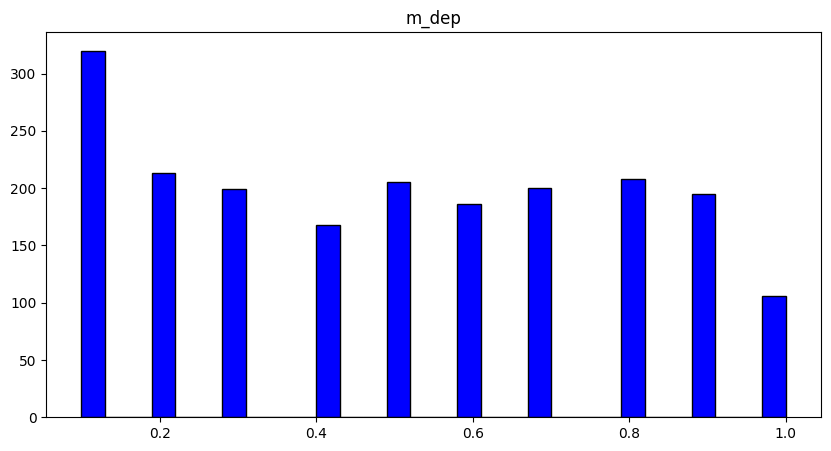

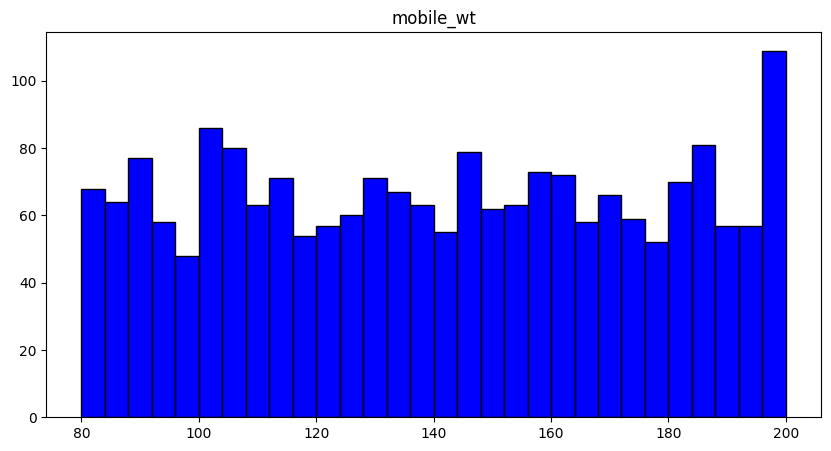

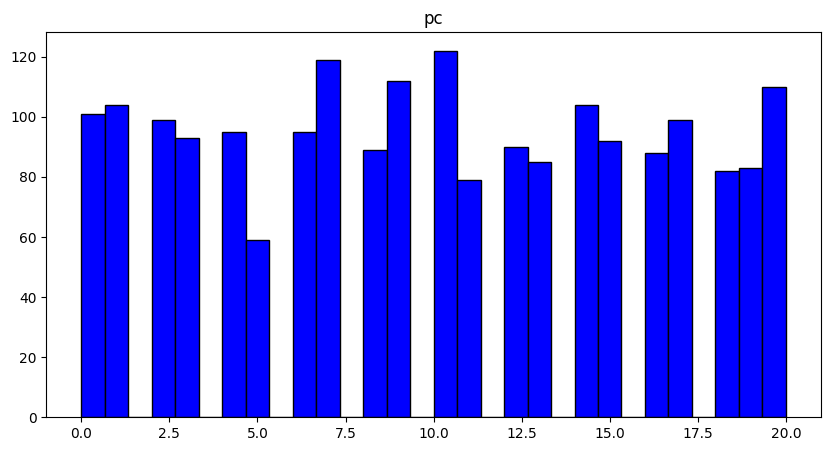

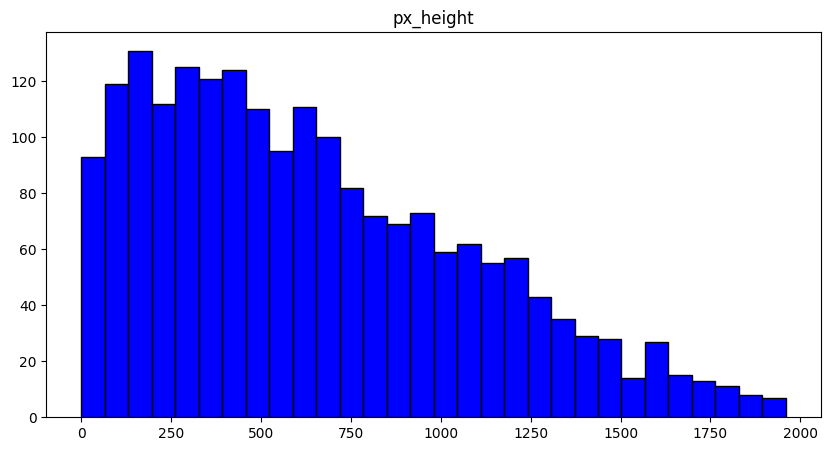

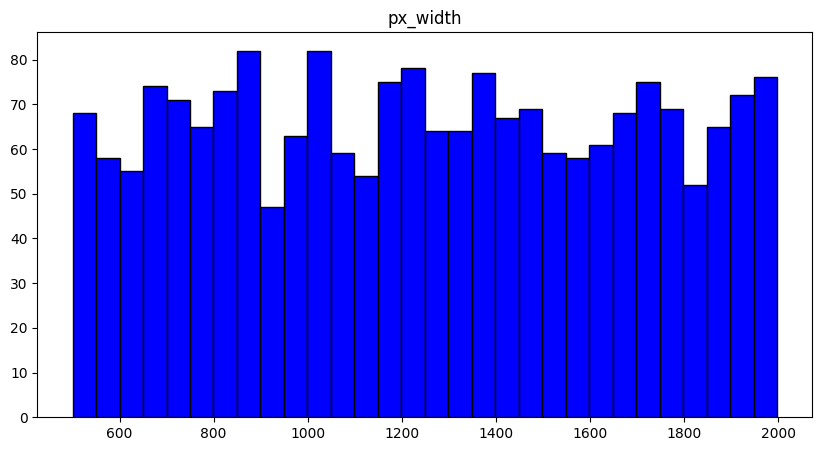

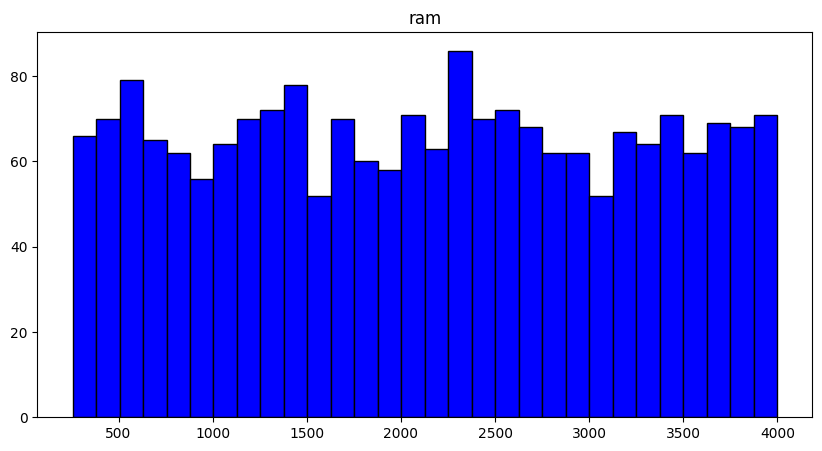

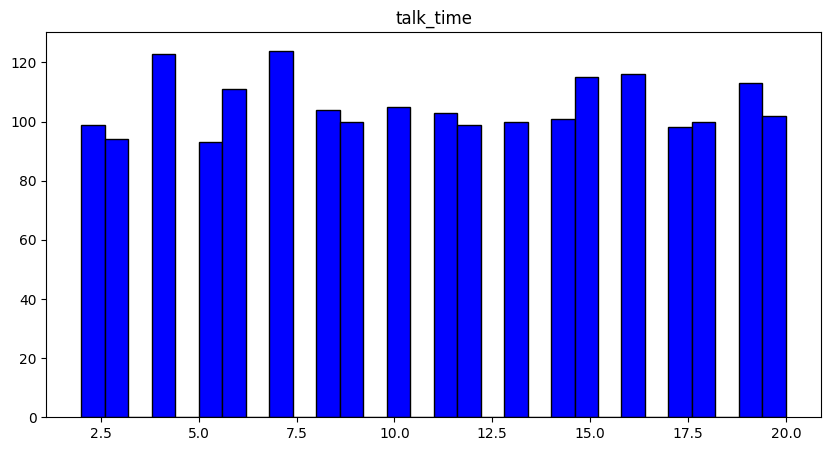

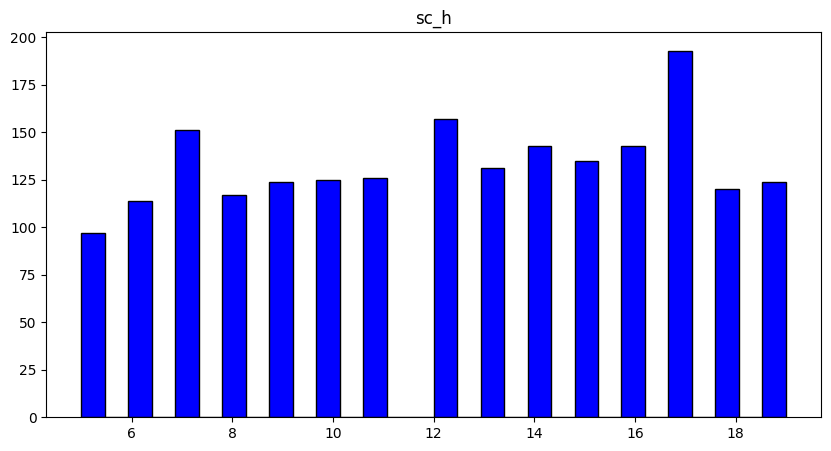

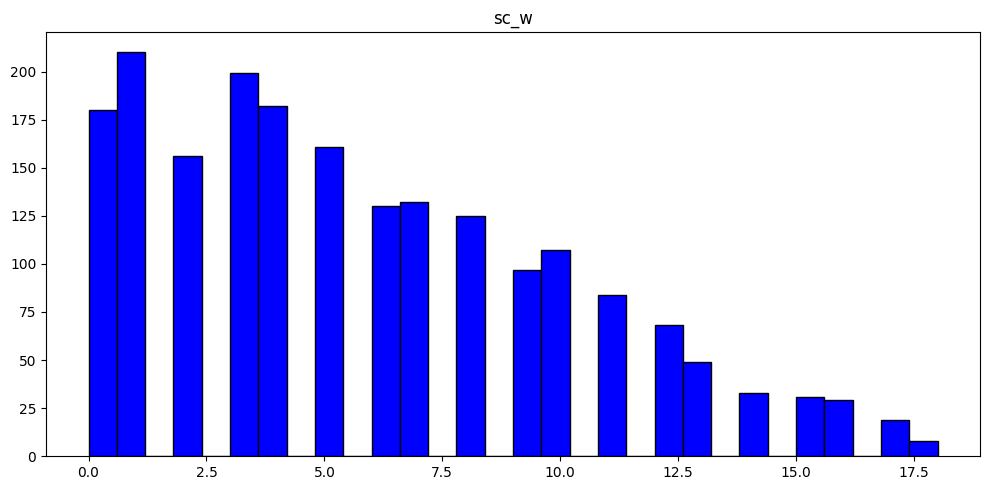

In [ ]:
for col in df_numerical[:-1]:
  plt.figure(figsize=(10,5))
  plt.hist(df[col], bins=30, color="blue", linewidth=1, edgecolor="black")
  plt.title(col)
plt.tight_layout();

Рассмотрим распределение px_height и sc_w

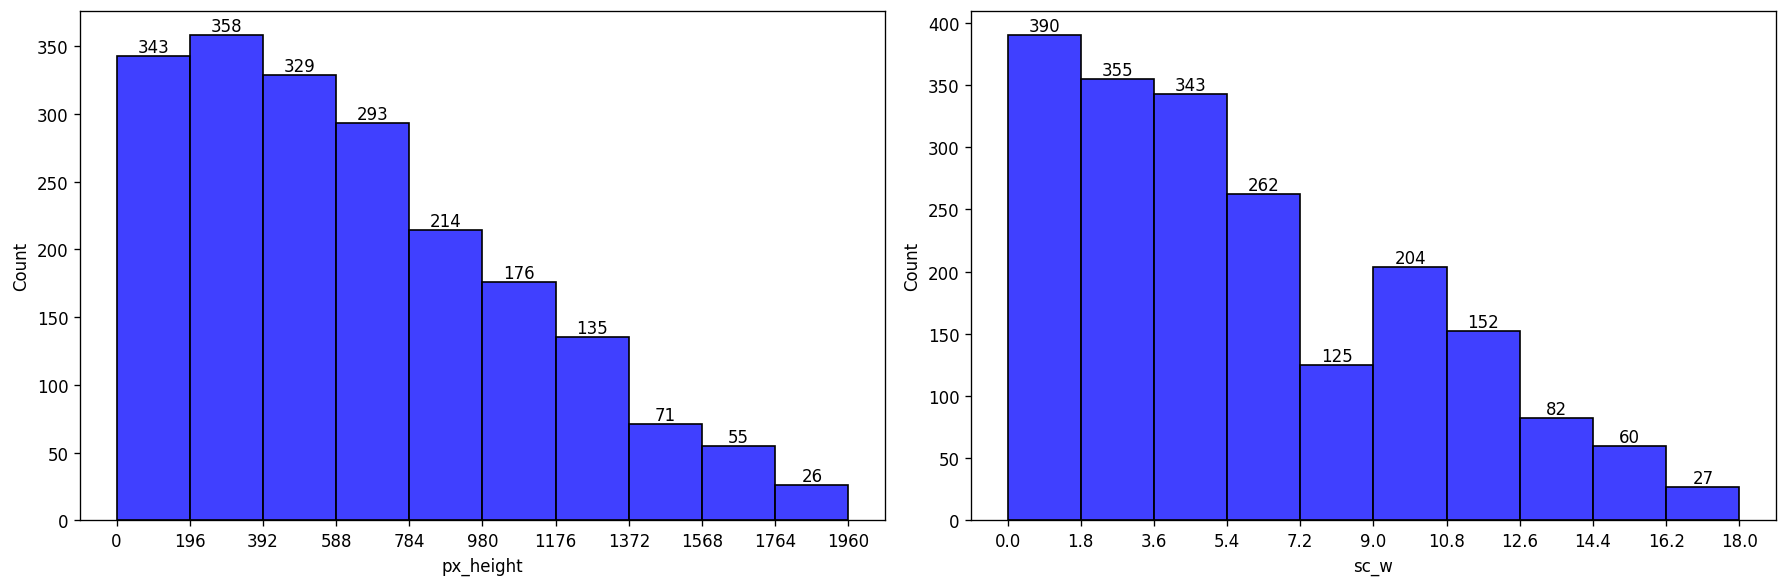

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=120)

# px_height:
_, bin_edges = np.histogram(df['px_height'], range=(np.floor(df['px_height'].min()), np.ceil(df['px_height'].max())))
graph1 = sns.histplot(x='px_height', data=df, bins=bin_edges, color='blue', ax=ax[0])
ax[0].set_xticks(np.round(bin_edges,1))
for cont in graph1.containers:
        graph1.bar_label(cont)

# sc_w:
_, bin_edges = np.histogram(df['sc_w'], range=(np.floor(df['sc_w'].min()), np.ceil(df['sc_w'].max())))
graph2 = sns.histplot(x='sc_w', data=df, bins=bin_edges, color='blue', ax=ax[1])
ax[1].set_xticks(np.round(bin_edges,1))
for cont in graph2.containers:
        graph2.bar_label(cont)

plt.tight_layout()
plt.show()

Столбцы содержат много значений, равных нулю или близких к нулю, которые выглядят как шум

In [ ]:
noise_sc_w = df[df['sc_w'] < 2].index

noise_px_height = df[df['px_height'] < 5].index

In [ ]:
print('Количество значений, которые определяем как шум для sc_w: ', len(noise_sc_w))
print('Количество значений, которые определяем как шум для px_height: ', len(noise_px_height))

Количество значений, которые определяем как шум для sc_w:  390
Количество значений, которые определяем как шум для px_height:  9


# Выбор признаков

## Матрица корреляции

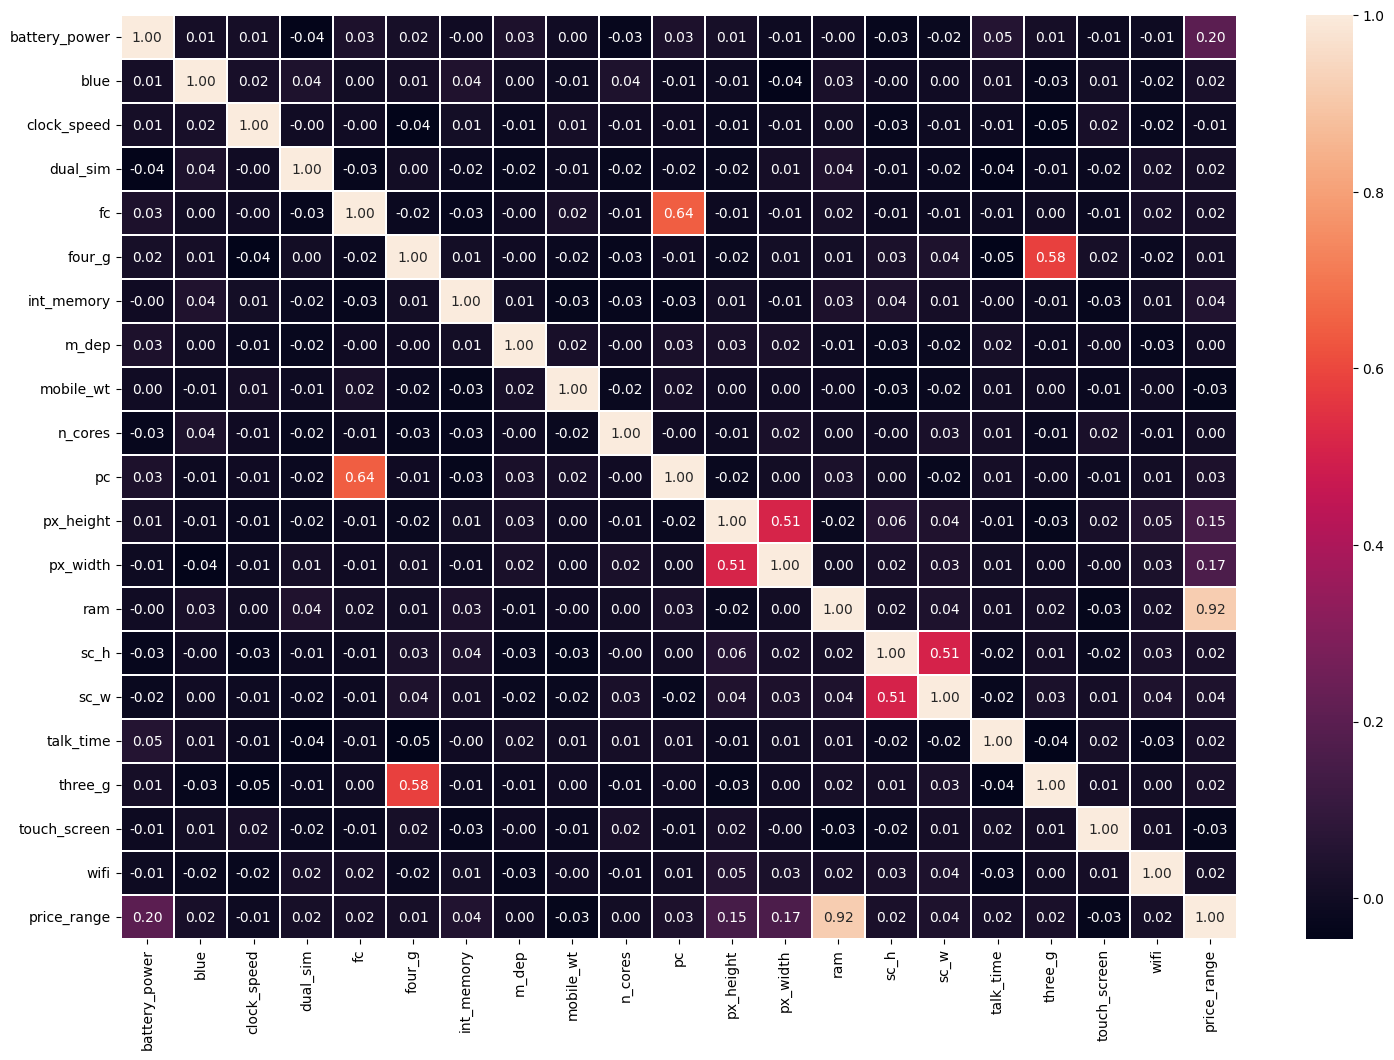

In [ ]:
corr = df.corr()

plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.2)
plt.show()

Price_range сильно коррелирует с ram (0,92).
Price_range имеет низкое значение корреляции с остальными

# SVM

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Масштабирование

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

##Настройка гиперпараметров

In [ ]:
def tune_hyperparameters(clf, param_grid, X_train, y_train):
    """
    Параметры:

    clf : классификатор
    param_grid: Словарь значений гиперпараметров
    X_train: тестовая выборка
    y_train: целевое значение

    Функция возфращает лучшие параметры для классфиктора:
    """

    # перекрестная проверка
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # GridSearchCV
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    clf_grid.fit(X_train, y_train)

    print("Best hyperparameters:\n", clf_grid.best_params_)

    return clf_grid.best_estimator_

In [ ]:
# param_grid = [{'kernel': ['poly'],
#                'degree': [2, 3, 4, 5],
#                'gamma': [1, 0.1, 0.01, 0.001],
#                'C': [0.01, 0.1, 1, 10, 100]},

#               {'kernel': ['rbf','sigmoid'],
#                'gamma': [1, 0.1, 0.01, 0.001],
#                'C': [0.01, 0.1, 1, 10, 100]},

#               {'kernel': ['linear'],
#                'C': [0.01, 0.1, 1, 10, 50, 100]}
#              ]

param_grid = {'kernel': ['linear'],
               'C': [ 0.1, 1, 10, 50, 100]
             }

In [ ]:
svm = SVC(probability=True, random_state=0)

# поиск лучших гиперпараметров
svm_optimized = tune_hyperparameters(svm, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 50, 'kernel': 'linear'}


## Оценка модели

In [ ]:
def metrics_calculator(clf, X_test, y_test, model_name):
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                                index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                                columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [ ]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):

    sns.set(font_scale=1.5)

    # Тестовый набор
    y_pred_test = clf.predict(X_test)
    print(classification_report(y_test, y_pred_test))

    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))

    # Таблица с оценками
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax1.table(cellText=result.values, colLabels=result.columns,
                      rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)
    ax1.axis('tight')
    ax1.axis('off')
    ax1.set_title('Оценка {}'.format(model_name), fontsize=18)

    # Матрица ошибок
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                          colorbar=False, ax=ax2)
    ax2.set_title('Confusion Matrix')
    ax2.grid(False)

    plt.tight_layout()
    plt.show()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       400
           1       0.98      0.97      0.98       400
           2       0.98      0.98      0.98       400
           3       0.99      0.99      0.99       400

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       0.99      0.97      0.98       100
           2       0.97      0.98      0.98       100
           3       0.99      0.98      0.98       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98 

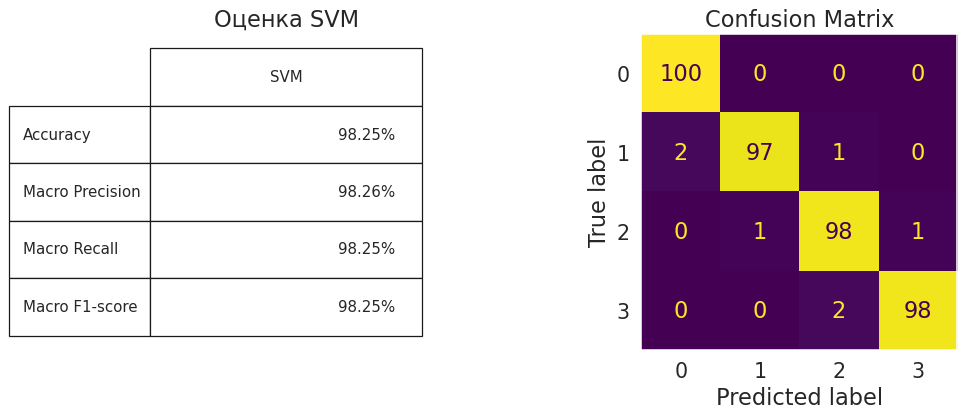

In [ ]:
model_evaluation(svm_optimized, X_train, X_test, y_train, y_test, 'SVM')

In [ ]:
svm_result = metrics_calculator(svm_optimized, X_test, y_test, 'SVM')

# Decision Tree

Дерево решений — это алгоритм, чувствительный к шуму и склонный к переобучению, особенно при обучении на зашумленных данных. Поэтому нам необходимо очистить набор данных. Поскольку количество значений шума, обнаруженных в наборе данных велико, мы не можем удалить соответствующие строки из набора данных. Поэтому мы используем KNNImputer для расчета этих значений шума

In [ ]:
df_denoised = df.copy()

# Замена шума значением nan
df_denoised.loc[noise_sc_w,'sc_w'] = np.nan
df_denoised.loc[noise_px_height,'px_height'] = np.nan

imputer = KNNImputer(n_neighbors=2)
imputed_data = imputer.fit_transform(df_denoised)

df_denoised = pd.DataFrame(imputed_data, columns=df_denoised.columns)

X_denoised = df_denoised.drop('price_range', axis=1)
df_denoised['price_range'] = df_denoised['price_range'].astype(int)
y = df_denoised['price_range']

# Настройка гиперпараметров

In [ ]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 15),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2']}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_denoised, y, test_size=0.2, random_state=0, stratify=y)
dt = DecisionTreeClassifier(random_state=0)
dt_optimized = tune_hyperparameters(dt, param_grid, X_train, y_train)

Best hyperparameters:
 {'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 8}


## Оценка модели


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       400
           1       0.96      0.94      0.95       400
           2       0.92      0.97      0.94       400
           3       0.99      0.95      0.97       400

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       100
           1       0.79      0.86      0.82       100
           2       0.77      0.78      0.78       100
           3       0.89      0.84      0.87       100

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84 

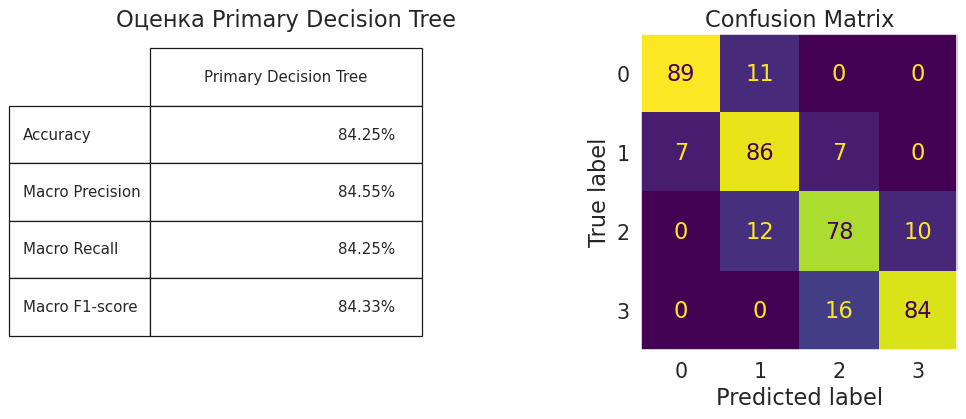

In [ ]:
model_evaluation(dt_optimized, X_train, X_test, y_train, y_test, 'Primary Decision Tree')

In [ ]:
dt_result = metrics_calculator(dt_optimized, X_test, y_test, 'Decision Tree')

#  Random Forest

## Настройка гиперпараметров

Оптимизация гиперпараметров случайного леса может повысить точность модели и предотвратить переобучение или недостаточное подбор данных. Модель случайного леса состоит из нескольких деревьев решений, которые могут быть как поверхностными, так и глубокими. Мелкие деревья имеют ограниченное количество ветвей или уровней.
в то время как глубокие деревья имеют много ветвей или уровней и не полностью выросли. Глубокие деревья, как правило, имеют низкую предвзятость, но высокую дисперсию, что делает их подходящими для методов объединения, направленных на уменьшение дисперсии. При выборе гиперпараметров для случайного леса
важно учитывать наличие глубоких деревьев при выборе диапазона значений для гиперпараметров случайного леса.

     
**Наиболее распространенные гиперпараметры**

* n_estimators
* criterion
* max_depth
* min_samples_split
* min_samples_leaf
* bootstrap
* max_features

In [ ]:
param_grid = {
    'n_estimators': [70, 100, 120, 150],
    'max_depth': np.arange(10, 18),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_denoised, y, test_size=0.2, random_state=0, stratify=y)

rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

rf_optimised = tune_hyperparameters(rf, param_grid, X_train, y_train)

Best hyperparameters:
 {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}


## Оценка


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.89      0.93      0.91       100
           2       0.84      0.83      0.83       100
           3       0.89      0.88      0.88       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90 

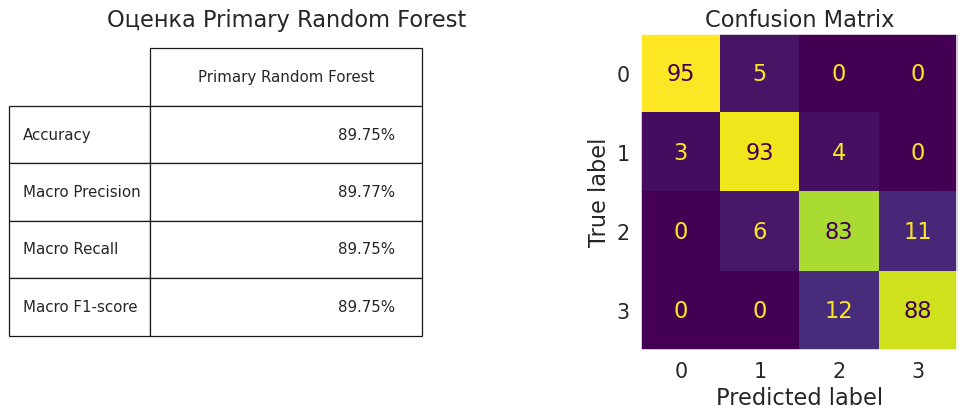

In [ ]:
model_evaluation(rf_optimised, X_train, X_test, y_train, y_test, 'Primary Random Forest')

In [ ]:
# Save the final performance of Random Forest classifier
rf_result = metrics_calculator(rf_optimised, X_test, y_test, 'Random Forest')

#Выводы

В этом проекте мы столкнулись с проблемой многоклассовой классификации, основной проблемой которой был зашумленный набор данных и отсутствие достаточных знаний предметной области для очистки набора данных. Как и ожидалось, алгоритм SVM имел лучшую производительность, чем алгоритмы дерева решений и случайный лес, из-за его меньшей чувствительности к зашумленным данным.

In [ ]:
# Concatenate previous classifiers perfermance results into a single dataframe
results = pd.concat([svm_result, dt_result, rf_result], axis=1).T

# Sort the dataframe in descending order based on accuracy
results.sort_values(by='Accuracy', ascending=False, inplace=True)

# Color the accuracy column
results.style.applymap(lambda x: 'background-color: red', subset='Accuracy')

,Accuracy,Macro Precision,Macro Recall,Macro F1-score
SVM,98.25%,98.26%,98.25%,98.25%
Random Forest,89.75%,89.77%,89.75%,89.75%
Decision Tree,84.25%,84.55%,84.25%,84.33%


Прогнозируем класс, используя модель SVM:

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range']

svm_pipeline = Pipeline([
                         ('scaler', StandardScaler()),
                         ('svm', SVC(probability=True, C=50, kernel='linear', random_state=0))
                        ])

svm_pipeline.fit(X, y)

df_samples = pd.read_csv('test.csv')
df_samples.drop('id', axis=1, inplace=True)

df_samples['price_range_pred'] = svm_pipeline.predict(df_samples)
df_samples['price_range_pred']

,price_range_pred
0,3
1,3
2,2
3,3
4,1
...,...
995,2
996,1
997,0
998,2


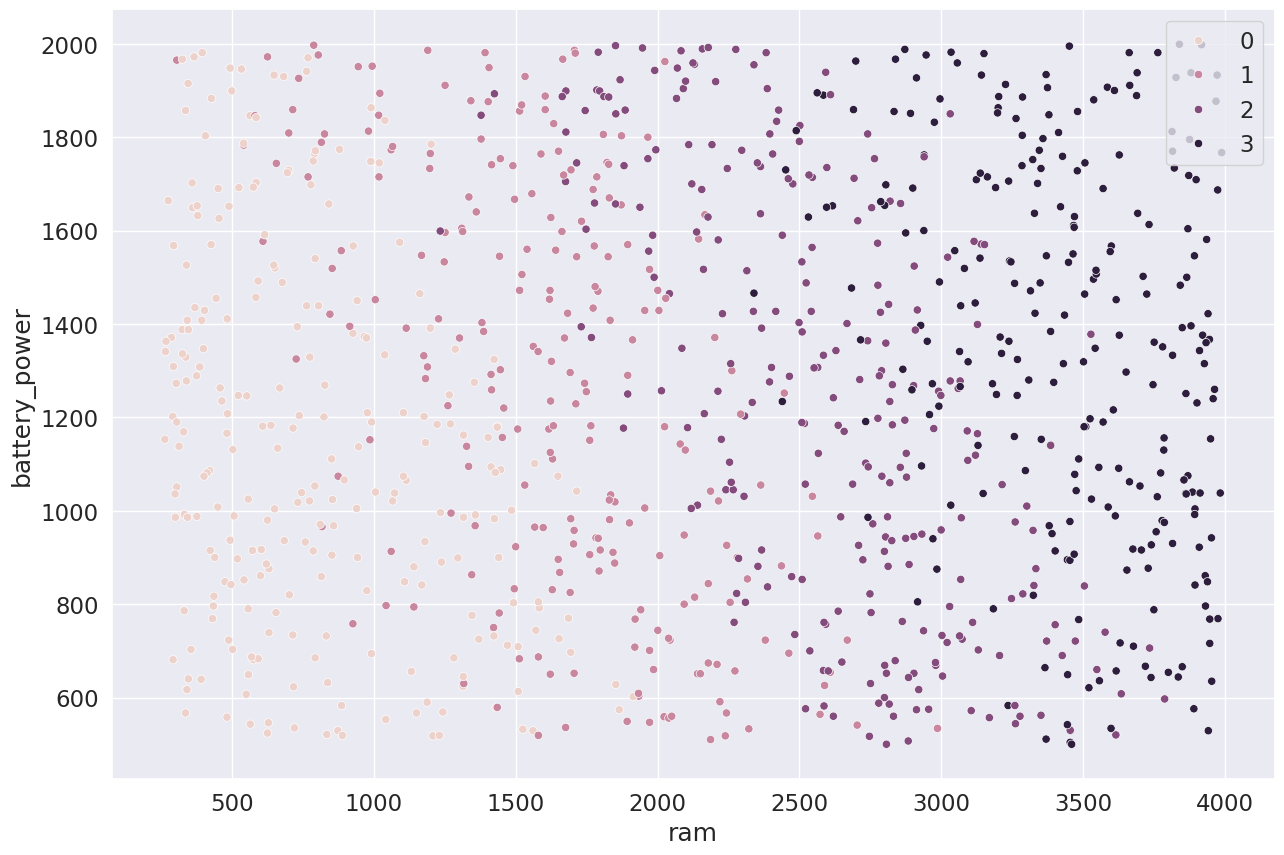

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_samples, x='ram', y='battery_power', hue='price_range_pred')

plt.legend(loc='upper right')
plt.show()

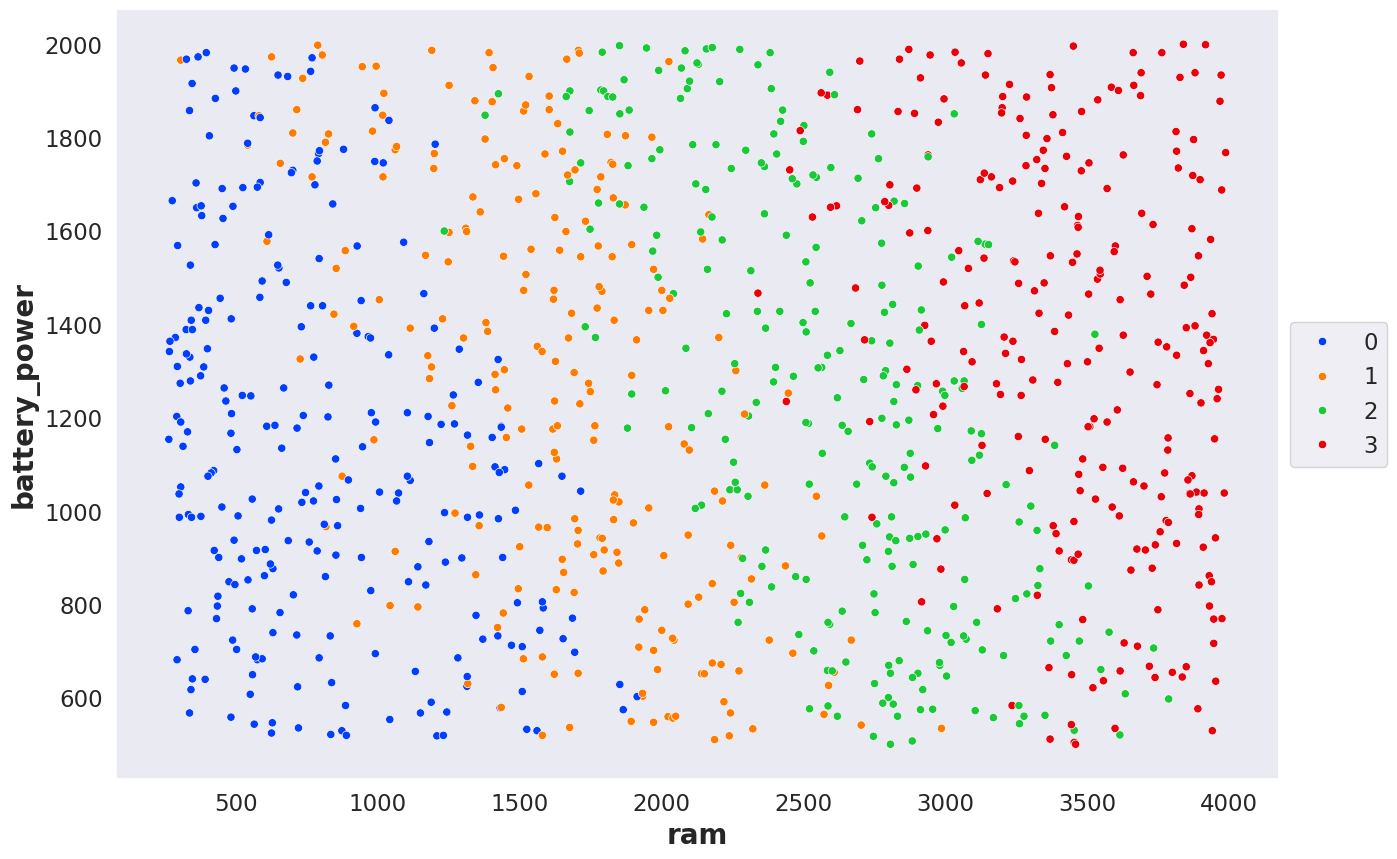

In [ ]:
plt.figure(figsize=(15,10))
sns.set_palette('bright')
sns.scatterplot(data=df_samples,x='ram',y='battery_power',hue='price_range_pred',palette='bright')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.xlabel("ram",fontsize=20,fontweight='bold')
plt.ylabel('battery_power',fontsize=20,fontweight='bold')
plt.grid()
plt.show()